In [1]:
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.random import set_seed

In [2]:
numpy_seed = 0
np.random.seed(numpy_seed)
tensorflow_seed = 0
set_seed(tensorflow_seed)

In [3]:
SAVE_DIRECTORY = "../data/"
MODEL_DIRECTORY = "./models/"
dim = (224, 224)
X = np.load(SAVE_DIRECTORY+"X.npy")
y = np.load(SAVE_DIRECTORY+"y.npy")

In [4]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.33)
del(X,y)

In [5]:
base_model = MobileNet(input_shape=(dim[0],dim[0],3), include_top=False,
                       weights='imagenet', pooling="avg")
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [6]:
model = Sequential([base_model, 
                    Dense(128, activation="elu"),
                    Dense(1, activation="sigmoid")])
for layer in model.layers:
    layer.trainable = True
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1024)              3228864   
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,360,193
Trainable params: 3,338,305
Non-trainable params: 21,888
_________________________________________________________________


In [7]:
BATCH_SIZE = train_size = len(X_train)
learning_rate = (1e-4)*1
optimizer = Nadam(learning_rate= learning_rate)
model.compile(optimizer = optimizer, loss = ["binary_crossentropy"], 
              metrics = ["accuracy",Precision(), Recall()])
epochs = 150

In [8]:
model_name = "model.h5"
checkpoint_cb = ModelCheckpoint(MODEL_DIRECTORY+model_name, 
                                monitor = 'val_loss', 
                                save_best_only=True,
                                mode = "min")
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, 
                    epochs = epochs, validation_data = (X_test, y_test), 
                    callbacks=[checkpoint_cb])

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 0.6912 - accuracy: 0.6923 - precision: 1.0000 - recall: 0.3333 - val_loss: 0.6140 - val_accuracy: 0.5714 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 2/150
1/1 [==============================] - 0s 216ms/step - loss: 0.0423 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6178 - val_accuracy: 0.5714 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 3/150
1/1 [==============================] - 0s 319ms/step - loss: 0.0237 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6148 - val_accuracy: 0.5714 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 4/150
1/1 [==============================] - 1s 746ms/step - loss: 0.0155 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6095 - val_accuracy: 0.5714 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 5/150
1/1 [==============================] - 1s 783ms/step - loss: 0.0106 - accuracy: 1.0000 - precision:

1/1 [==============================] - 1s 715ms/step - loss: 1.7408e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2882 - val_accuracy: 0.7143 - val_precision: 1.0000 - val_recall: 0.5000
Epoch 38/150
1/1 [==============================] - 1s 706ms/step - loss: 1.6879e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2785 - val_accuracy: 0.8571 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 39/150
1/1 [==============================] - 1s 728ms/step - loss: 1.6395e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2685 - val_accuracy: 0.8571 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 40/150
1/1 [==============================] - 1s 695ms/step - loss: 1.5952e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2587 - val_accuracy: 0.8571 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 41/150
1/1 [==============================] - 1s 691ms/step - loss: 1.5544e-04 - accuracy: 1.00

1/1 [==============================] - 1s 915ms/step - loss: 9.7638e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0790 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 74/150
1/1 [==============================] - 1s 911ms/step - loss: 9.6678e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0759 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 75/150
1/1 [==============================] - 1s 798ms/step - loss: 9.5737e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0730 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 76/150
1/1 [==============================] - 1s 1s/step - loss: 9.4813e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0701 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 77/150
1/1 [==============================] - 1s 746ms/step - loss: 9.3907e-05 - accuracy: 1.0000 

Epoch 109/150
1/1 [==============================] - 1s 666ms/step - loss: 7.1115e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0241 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 110/150
1/1 [==============================] - 1s 771ms/step - loss: 7.0545e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0236 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 111/150
1/1 [==============================] - 1s 961ms/step - loss: 6.9982e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 112/150
1/1 [==============================] - 1s 705ms/step - loss: 6.9425e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 113/150
1/1 [==============================] - 1s 725ms/step - loss: 6.8874e-0

Epoch 145/150
1/1 [==============================] - 1s 722ms/step - loss: 5.4203e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 146/150
1/1 [==============================] - 1s 703ms/step - loss: 5.3823e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 147/150
1/1 [==============================] - 1s 721ms/step - loss: 5.3446e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0127 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 148/150
1/1 [==============================] - 1s 771ms/step - loss: 5.3074e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 149/150
1/1 [==============================] - 1s 766ms/step - loss: 5.2705e-0

In [9]:
history_dict = history.history
keys = history_dict.keys()
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
precision = history_dict['precision']
val_precision = history_dict['val_precision']
recall = history_dict['precision']
val_recall = history_dict['val_recall']

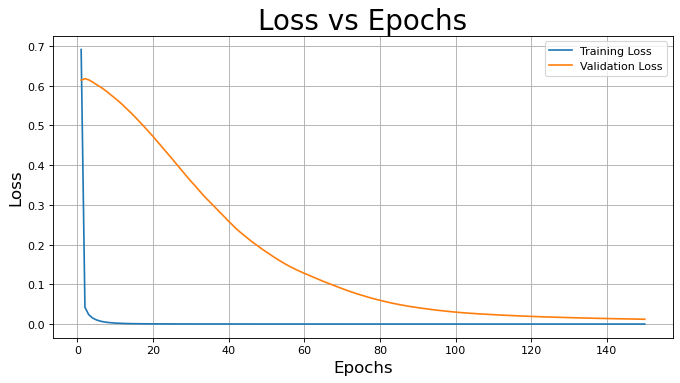

In [12]:
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Loss vs Epochs', fontsize = 25)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()

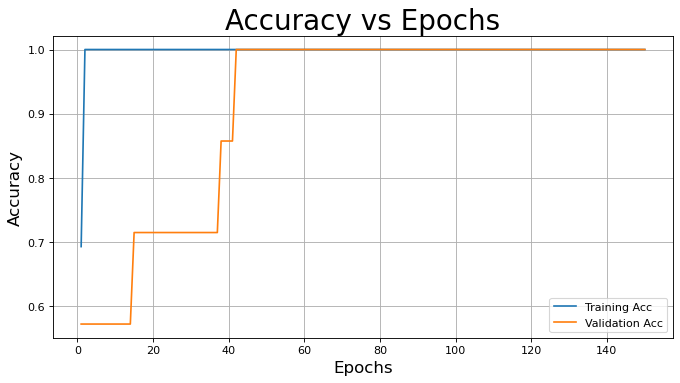

In [13]:
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc,  label='Training Acc')
plt.plot(epochs, val_acc,  label='Validation Acc')
plt.title('Accuracy vs Epochs', fontsize = 25)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()